<a href="https://colab.research.google.com/github/LexanderThakur/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

titanic=pd.read_csv('train.csv')


titanic.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Dealing with missing values

In [ ]:
print(titanic[( ~titanic['Cabin'].isnull() ) & (titanic['Survived']==1)].shape[0])
print(titanic[(titanic['Cabin'].isnull()) & (titanic['Survived']==0)].shape[0])
print(titanic[titanic['Survived']==0].shape[0])

print()

136
481
549



In [ ]:
#Age has 177 missing

#using median to fill age
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

#Embarked has 2 missing values so just fillinf with C
# using mode to fill embarked

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True) # mode return a series

#Cabin no. has 687 missing values
#filling it with unkown for now
titanic['Cabin'].fillna('Unknown',inplace=True)

titanic.to_csv('titanic_filled.csv', index=False)




<ipython-input-31-46980451>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


Feature Engienering


In [ ]:
titanic=pd.read_csv('./titanic_filled.csv')


# make ages less than 1 to 1
titanic.loc[titanic['Age'] < 1, 'Age'] = 1

titanic['Rounded_Ages']= titanic['Age'].apply(lambda x: x if x<15 else round(x / 5.0) * 5)

titanic['FareGroup'] = titanic['Fare'].apply(lambda x: round(x / 10) * 10)


titanic['Sex_numerical']= titanic['Sex'].apply(lambda x:1 if x=='male' else 0)



#titanic.to_csv('titanic_feature_1.csv', index=False)

In [ ]:
import pandas as pd

titanic=pd.read_csv('./titanic_feature_1.csv')

# extract first letter of cabin

titanic['Cabin_letter']=titanic['Cabin'].apply(lambda x: x[0])

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic['Encoded_Cabin']=le.fit_transform(titanic['Cabin_letter'])

titanic.to_csv('titanic_feature_2.csv',index=False)


Training Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()

# X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin']]
# Y=titanic['Survived']

# model.fit(X,Y)

test=pd.read_csv('./test_1.csv')
test['Cabin_letter']=test['Cabin'].apply(lambda x: x[0])
test['Encoded_Cabin']=le.fit_transform(test['Cabin_letter'])
test.to_csv('test_2.csv')


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


titanic['family_size']=titanic['SibSp']+titanic['Parch']



X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]
Y=titanic['Survived']

model.fit(X,Y)


test=pd.read_csv('./test_2.csv')

test['family_size']=test['SibSp']+test['Parch']

X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]

prediction_2=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_2['PassengerId']=test['PassengerId']
prediction_2['Survived']=model.predict(X_test)


# prediction_2.to_csv('prediction_2.csv',index=False)
titanic.to_csv('titanic_feature_3.csv')


Trying LDA


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
model=LinearDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_3.csv');

X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_2.csv')

test['family_size']=test['SibSp']+test['Parch']

X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]

prediction_3=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_3['PassengerId']=test['PassengerId']
prediction_3['Survived']=model.predict(X_test)

# prediction_3.to_csv('prediction_3.csv',index=False)
test.to_csv('test_3.csv')

#score .76

Trying QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
model=QuadraticDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_3.csv');

X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_3.csv')



X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]

prediction_4=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_4['PassengerId']=test['PassengerId']
prediction_4['Survived']=model.predict(X_test)

#prediction_4.to_csv('prediction_3_QDA.csv',index=False)
# score .74


Trying naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
model=GaussianNB()
titanic=pd.read_csv('titanic_feature_3.csv');

X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_3.csv')



X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size']]

prediction_4=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_4['PassengerId']=test['PassengerId']
prediction_4['Survived']=model.predict(X_test)

prediction_4.to_csv('prediction_3_GNB.csv',index=False)
#.73

More Feature Eng


In [ ]:
import pandas as pd

titanic=pd.read_csv('./titanic_feature_3.csv')
test=pd.read_csv('./test_3.csv')
from sklearn.preprocessing import LabelEncoder
# embarked as a feature
le1 = LabelEncoder()
titanic['Embarked_encoded'] = le1.fit_transform(titanic['Embarked'])
test['Embarked_encoded'] = le1.transform(test['Embarked'])

#ticket numeric part as a feature

import re

# Extract numeric part from ticket (drop letters, slashes, etc.)
def extract_ticket_number(ticket):
    numbers = re.findall(r'\d+', ticket)
    return int(numbers[-1]) if numbers else 0  # use last number if multiple

titanic['Ticket_Num'] = titanic['Ticket'].apply(extract_ticket_number)

# Now bin into ranges of 10
titanic['TicketGroup'] = titanic['Ticket_Num'].apply(lambda x: round(x / 10) * 10)


test['Ticket_Num'] = test['Ticket'].apply(extract_ticket_number)
test['TicketGroup'] = test['Ticket_Num'].apply(lambda x: round(x / 10) * 10)

le2=LabelEncoder()

#extract ticket prefix
def get_ticket_prefix(ticket):
    return ticket.split()[0] if not ticket.split()[0].isdigit() else 'None'

titanic['Ticket_Prefix'] = titanic['Ticket'].apply(get_ticket_prefix)


test['Ticket_Prefix'] = test['Ticket'].apply(get_ticket_prefix)
# Step 1: Fit on training prefixes
prefixes = titanic['Ticket_Prefix'].unique().tolist()
prefix_mapping = {prefix: idx for idx, prefix in enumerate(prefixes)}

# Step 2: Map training data
titanic['Ticket_Prefix_E'] = titanic['Ticket_Prefix'].map(prefix_mapping)

# Step 3: Map test data with default for unseen prefixes
test['Ticket_Prefix_E'] = test['Ticket_Prefix'].map(lambda x: prefix_mapping.get(x, -1))  # -1 for unseen



titanic.to_csv('titanic_feature_4.csv',index=False)
test.to_csv('test_4.csv',index=False)

Applying LDA on new Features


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
model=LinearDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_4.csv');


X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size','Embarked_encoded','TicketGroup','Ticket_Prefix_E']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_4.csv')



X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size','Embarked_encoded','TicketGroup','Ticket_Prefix_E']]

prediction_3=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_3['PassengerId']=test['PassengerId']
prediction_3['Survived']=model.predict(X_test)

prediction_3.to_csv('prediction_5_moref.csv',index=False)
#.761

Tryin logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
model=LogisticRegression()
titanic=pd.read_csv('titanic_feature_4.csv');


X=titanic[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size','Embarked_encoded','TicketGroup','Ticket_Prefix_E']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_4.csv')



X_test=test[['Pclass','Sex_numerical','Rounded_Ages','FareGroup','Encoded_Cabin','family_size','Embarked_encoded','TicketGroup','Ticket_Prefix_E']]

prediction_3=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_3['PassengerId']=test['PassengerId']
prediction_3['Survived']=model.predict(X_test)

prediction_3.to_csv('prediction_5_moref_logistic.csv',index=False)
#.66

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


correlation matrix

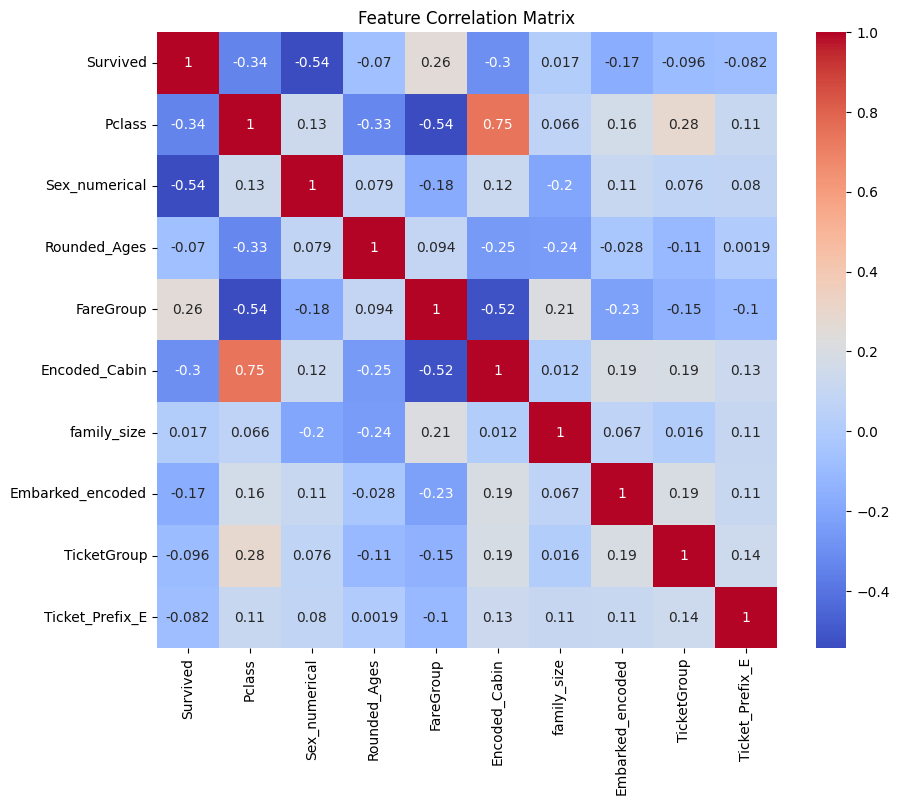

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
titanic=pd.read_csv('titanic_feature_4.csv')
# Compute correlation matrix
corr_matrix = titanic[['Survived','Pclass','Sex_numerical','Rounded_Ages','FareGroup',
                       'Encoded_Cabin','family_size','Embarked_encoded','TicketGroup','Ticket_Prefix_E']].corr()

# Plot it
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


more feature eng

In [16]:
titanic=pd.read_csv('./titanic_feature_5.csv')


# converting family size to is alone

#titanic['is_alone']= titanic['family_size'].apply(lambda x: 1 if x==1 else 0)


# group ages more wider
def group_age(x):
  if x<10:
    return 1
  elif x<30:
    return 2
  elif x<50:
    return 3
  else:
    return 4

titanic['Age_Group2']= titanic['Age'].apply(lambda x: group_age(x))

#is unkown feature
# titanic['is_unknown']= titanic['Cabin_letter'].apply(lambda x: 1 if x=='U' else 0)

titanic.to_csv('titanic_feature_6.csv',index=False)

In [15]:
test=pd.read_csv('./test_feature_5.csv')


# converting family size to is alone

# test['is_alone']= test['family_size'].apply(lambda x: 1 if x==1 else 0)


# group ages more wider
def group_age(x):
  if x<10:
    return 1
  elif x<30:
    return 2
  elif x<50:
    return 3
  else:
    return 4

test['Age_Group2']= test['Age'].apply(lambda x: group_age(x))

#is unkown feature
# test['is_unknown']= test['Cabin_letter'].apply(lambda x: 1 if x=='U' else 0)

test.to_csv('test_feature_6.csv')

trying lda on this

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
model=LinearDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_5.csv');








X=titanic[['Pclass','Sex_numerical','Age_Group2','is_alone','Embarked_encoded','is_unknown']]
Y=titanic['Survived']





model.fit(X,Y)
test=pd.read_csv('./test_feature_5.csv')



X_test=test[['Pclass','Sex_numerical','Age_Group','is_alone','Embarked_encoded','is_unknown']]

prediction=pd.DataFrame(columns=['PassengerId','Survived'])

prediction['PassengerId']=test['PassengerId']
prediction['Survived']=model.predict(X_test)

prediction.to_csv('prediction_7_ldaOnLessF.csv',index=False)
#.75

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_Group
Feature names seen at fit time, yet now missing:
- Age_Group2


cross validation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load your data
titanic = pd.read_csv('titanic_feature_5.csv')

def group_age(x):
    if x < 12:
        return 0  # Child
    elif x < 20:
        return 1  # Teen
    elif x < 35:
        return 2  # Young adult
    elif x < 60:
        return 3  # Adult
    else:
        return 4  # Senior
titanic['Age_Group2']= titanic['Age'].apply(lambda x: group_age(x))







scaler = StandardScaler()
titanic['Fare_scaled'] = scaler.fit_transform(titanic[['Fare']])

# Define features and target
X = titanic[['Pclass','Sex_numerical','Age_Group2','Embarked_encoded','is_unknown','family_size']]
y = titanic['Survived']

# Initialize the model
model = LinearDiscriminantAnalysis()

# Perform 5-fold cross-validation (you can try 10 too)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.80446927 0.80898876 0.80337079 0.78651685 0.82022472]
Mean accuracy: 0.8047140794677045


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load your training data
titanic = pd.read_csv('titanic_feature_5.csv')


def group_age(x):
    if x < 12:
        return 0  # Child
    elif x < 20:
        return 1  # Teen
    elif x < 35:
        return 2  # Young adult
    elif x < 60:
        return 3  # Adult
    else:
        return 4  # Senior
titanic['Age_Group2']= titanic['Age'].apply(lambda x: group_age(x))







scaler = StandardScaler()
titanic['Fare_scaled'] = scaler.fit_transform(titanic[['Fare']])

# Define features and target
X = titanic[['Pclass','Sex_numerical','Age_Group2','Embarked_encoded','is_unknown','family_size','Fare_scaled']]
y = titanic['Survived']

# Initialize logistic regression model
# Use solver='liblinear' for small to medium datasets
log_model = LogisticRegression(solver='liblinear')

# Perform 5-fold cross-validation
scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# Print results
print("Logistic Regression CV scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())
log_model.fit(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
print(feature_importance)


Logistic Regression CV scores: [0.79329609 0.80337079 0.7752809  0.78651685 0.83146067]
Mean Accuracy: 0.7979850605737242
Standard Deviation: 0.01907148615854448
            Feature  Coefficient
0            Pclass    -0.604860
1     Sex_numerical    -2.512666
2        Age_Group2    -0.408063
3  Embarked_encoded    -0.133451
4        is_unknown    -0.616654
5       family_size    -0.213312
6       Fare_scaled     0.177732


lda


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
model=LinearDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_5.csv');


X=titanic[['Pclass','Sex_numerical','Age_Group','Embarked_encoded','is_unknown','family_size']]
Y=titanic['Survived']

model.fit(X,Y)
test=pd.read_csv('./test_feature_5.csv')



X_test=test[['Pclass','Sex_numerical','Age_Group','Embarked_encoded','is_unknown','family_size']]

prediction=pd.DataFrame(columns=['PassengerId','Survived'])

prediction['PassengerId']=test['PassengerId']
prediction['Survived']=model.predict(X_test)

prediction.to_csv('prediction_8.csv',index=False)


final

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
model=LinearDiscriminantAnalysis()
titanic=pd.read_csv('titanic_feature_5.csv');
test=pd.read_csv('./test_feature_5.csv')



titanic = pd.read_csv('titanic_feature_5.csv')

def group_age(x):
    if x < 12:
        return 0
    elif x < 20:
        return 1
    elif x < 35:
        return 2
    elif x < 60:
        return 3
    else:
        return 4
titanic['Age_Group2']= titanic['Age'].apply(lambda x: group_age(x))
test['Age_Group2']=test['Age'].apply(lambda x: group_age(x))









X=titanic[['Pclass','Sex_numerical','Age_Group2','Embarked_encoded','is_unknown','family_size']]
Y=titanic['Survived']

model.fit(X,Y)




X_test=test[['Pclass','Sex_numerical','Age_Group2','Embarked_encoded','is_unknown','family_size']]

prediction_3=pd.DataFrame(columns=['PassengerId','Survived'])

prediction_3['PassengerId']=test['PassengerId']
prediction_3['Survived']=model.predict(X_test)

prediction_3.to_csv('prediction_final.csv',index=False)
